In [ ]:
#Вариант -18
#Факторный анализ методом главных компонет
import pandas as pd
import numpy as np
from itertools import pairwise
df_prices = pd.read_excel('LAB_DATA_MSM.xlsx', sheet_name='Котировки')
columns = [3,4,6,13,14,16,17,20]
df_prices = np.array(df_prices[columns])[1:,:].T

def rel_increment(x):#относительное приращение
  l = pairwise(x)
  return [(i[1]-i[0])/i[0] for i in l]
data_increment =np.array( [rel_increment(i) for i in df_prices])
data_increment = np.array([(i-i.mean())/np.std(i) for i in data_increment])
data_increment


array([[-0.55590408,  1.36573673, -0.97673106, ..., -0.04834327,
        -0.21668464,  0.18776661],
       [-0.65069904,  0.57492789, -1.61836003, ..., -0.48973078,
        -1.29637306, -0.26072322],
       [ 2.63236924,  2.17249704,  0.83897692, ...,  0.54145528,
        -1.09078976,  0.02988679],
       ...,
       [ 1.22876316,  1.97334279, -1.06260105, ..., -0.72352288,
        -0.75134739, -0.27778184],
       [ 2.30363425,  0.58321342, -0.94339084, ...,  1.50710119,
        -1.9747639 , -0.43754745],
       [ 3.14640389,  0.64008959, -0.75939572, ...,  0.42318387,
        -0.23078922,  0.01130453]])

In [ ]:
#Выясним целесообразность применения факторного анализа с помощью проверки гипотезы о независимости признаков
from scipy.stats.distributions import chi2

A_1 = np.cov(data_increment,bias = True)
k,n = data_increment.shape
D_mul = 1
for i in data_increment:
  D_mul *= np.var(i)

lm = np.linalg.det(A_1)**(n/2)/D_mul**(n/2)
ro = 1-(2*k+11)/(6*n)
etta = -ro*2*np.log(lm)
nu = 1/2*k*(k-1)
chi_2 = chi2.ppf(0.94, df=nu)
print('Критическое значение:', chi_2)
if etta<chi_2:
  print('Гипотеза H0 принимается')
else:
  print('Гипотеза H0 отвергается')
k,n

Критическое значение: 40.470982880443266
Гипотеза H0 отвергается


(8, 165)

In [ ]:
print('Признаки коррелируют между собой и фаторный анализ целесообразен')

Признаки коррелируют между собой и фаторный анализ целесообразен


In [ ]:
#Проведем факторный анализ относительных приращений методом главных компонент
from functools import reduce
from operator import mul

A = np.cov(data_increment,bias =True)
k,n = data_increment.shape
df = pd.DataFrame(A)
df


,0,1,2,3,4,5,6,7
0,1.000000,0.275313,0.190738,0.052724,0.087929,0.349217,0.106634,0.130206
1,0.275313,1.000000,0.163025,0.151212,0.218834,0.374313,0.109374,0.172881
2,0.190738,0.163025,1.000000,0.223167,0.359416,0.317377,0.393247,0.128869
3,0.052724,0.151212,0.223167,1.000000,0.129302,0.168850,0.210165,0.685968
4,0.087929,0.218834,0.359416,0.129302,1.000000,0.200681,0.234732,0.116608
5,0.349217,0.374313,0.317377,0.168850,0.200681,1.000000,0.403456,0.173488
6,0.106634,0.109374,0.393247,0.210165,0.234732,0.403456,1.000000,0.211035
7,0.130206,0.172881,0.128869,0.685968,0.116608,0.173488,0.211035,1.000000


In [ ]:
#Находим собственные значения и собственные векторы ковариационной матрицы
eig_val, eig_vec = np.linalg.eig(A)

idx = np.argsort(eig_val)[::-1]  # индексы для сортировки
res_eig_val = eig_val[idx]
res_eig_vec = eig_vec[:, idx]
print("\nСобственные значения (упорядоченные по убыванию):")
for i, val in enumerate(res_eig_val, 1):
    print(f"λ{i}: {val}")
idx


Собственные значения (упорядоченные по убыванию):
λ1: 2.613640700045123
λ2: 1.3772586838865637
λ3: 1.0987555434902974
λ4: 0.8588082995681559
λ5: 0.7173565379471678
λ6: 0.5681844269956353
λ7: 0.47108139950013933
λ8: 0.29491440856691536


array([0, 1, 2, 4, 5, 7, 6, 3])

In [ ]:
#Критерии отбора
#По доле выделенной суммарной дисперсии
i = -1
res = 0
while res<0.7:
  i += 1
  res += res_eig_val[i]/np.trace(A)
  print(f'Доля объясненной дисперсии для {i+1} компонент: {res:.6f}')


Доля объясненной дисперсии для 1 компонент: 0.326705
Доля объясненной дисперсии для 2 компонент: 0.498862
Доля объясненной дисперсии для 3 компонент: 0.636207
Доля объясненной дисперсии для 4 компонент: 0.743558


In [ ]:
# 2. Критерий КАЙЗЕРА (λ >= 1)
eig_val_corr_sorted = np.sort(res_eig_val)[::-1]
kaiser_num = np.sum(eig_val_corr_sorted >= 1)
print(f"Критерий Кайзера: {kaiser_num} компонент(ы)")

Критерий Кайзера: 3 компонент(ы)


,lambdas,x
0,2.613641,1
1,1.377259,2
2,1.098756,3
3,0.858808,4
4,0.717357,5
5,0.568184,6
6,0.471081,7
7,0.294914,8


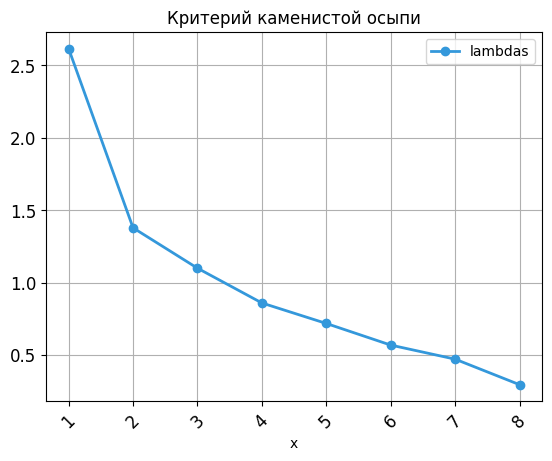

In [ ]:
#Критерий каменистой осыпи
df = pd.DataFrame({'lambdas':res_eig_val, 'x': range(1,9)})
df.plot(x = 'x', y = 'lambdas', title='Критерий каменистой осыпи',
grid=True,
color='#3498db',
style='-o',
linewidth=2,
fontsize=12,
legend=True,
rot=45 )#место на графике, где убывание собственных значений слева направо максимально замедляется
df


In [ ]:
#Запишем выражения для обобщенных факторов через исходные признаки (оценки векторов значений обобщенных факторов)
f = res_eig_vec[:,:4] .T @ data_increment
#Получим оценки векторов факторных нагрузок
weights = res_eig_vec[:,:4]*np.sqrt(res_eig_val[:4])
weights.shape

(8, 4)

In [ ]:
#запишем разложение для исходных признаков через обобщенные и характерные факторы
X_reconst = weights@f
error = X_reconst - data_increment
error.shape

(8, 165)

In [ ]:
#дисперсия,объясняемая каждым фактором
for i in np.sum(weights ** 2, axis =0):
  print(i)
res_eig_val #проверка

2.613640700045124
1.3772586838865633
1.0987555434902976
0.8588082995681557


array([2.6136407 , 1.37725868, 1.09875554, 0.8588083 , 0.71735654,
       0.56818443, 0.4710814 , 0.29491441])

In [ ]:
#Дисперсии характерных факторов
specific_variances = np.var(error, axis=1, ddof=1)

for i in range(8):
    print(f"D(e{i+1}): {specific_variances[i]:.3f}")

#Доли дисперсий для каждого из признаков, объясняемые каждым обобщенным фактором и всей совокупностью обощенных факторов
variance_explained = weights ** 2  # квадраты нагрузок = доли дисперсии
res = []
t = []
for i in range(8):
    total = 0
    for j in range(4):
        var_pc = variance_explained[i, j]
        total += var_pc
        res.append(var_pc)
        t.append(total)
        print(f"  PC{j+1}: {var_pc:.4f} ({var_pc*100:.1f}%)")
    print(f"  ВСЕ факторы: {total:.4f} ({total*100:.1f}%)")
pd.DataFrame(res)

D(e1): 0.441
D(e2): 0.390
D(e3): 0.531
D(e4): 0.305
D(e5): 0.256
D(e6): 0.504
D(e7): 0.388
D(e8): 0.299
  PC1: 0.1959 (19.6%)
  PC2: 0.1150 (11.5%)
  PC3: 0.3018 (30.2%)
  PC4: 0.0277 (2.8%)
  ВСЕ факторы: 0.6405 (64.0%)
  PC1: 0.2718 (27.2%)
  PC2: 0.0552 (5.5%)
  PC3: 0.2242 (22.4%)
  PC4: 0.1681 (16.8%)
  ВСЕ факторы: 0.7192 (71.9%)
  PC1: 0.3902 (39.0%)
  PC2: 0.0505 (5.1%)
  PC3: 0.1815 (18.1%)
  PC4: 0.0005 (0.0%)
  ВСЕ факторы: 0.6227 (62.3%)
  PC1: 0.3433 (34.3%)
  PC2: 0.4976 (49.8%)
  PC3: 0.0008 (0.1%)
  PC4: 0.0010 (0.1%)
  ВСЕ факторы: 0.8428 (84.3%)
  PC1: 0.2458 (24.6%)
  PC2: 0.0483 (4.8%)
  PC3: 0.1640 (16.4%)
  PC4: 0.3844 (38.4%)
  ВСЕ факторы: 0.8426 (84.3%)
  PC1: 0.4589 (45.9%)
  PC2: 0.1125 (11.3%)
  PC3: 0.0327 (3.3%)
  PC4: 0.0737 (7.4%)
  ВСЕ факторы: 0.6778 (67.8%)
  PC1: 0.3725 (37.3%)
  PC2: 0.0123 (1.2%)
  PC3: 0.1700 (17.0%)
  PC4: 0.2032 (20.3%)
  ВСЕ факторы: 0.7580 (75.8%)
  PC1: 0.3353 (33.5%)
  PC2: 0.4857 (48.6%)
  PC3: 0.0238 (2.4%)
  PC4: 0.0001 (

,0
0,0.195891
1,0.114985
2,0.301831
3,0.027746
4,0.271759
5,0.055204
6,0.224157
7,0.168113
8,0.390206
9,0.050543


In [ ]:
weights.shape

(8, 4)

In [ ]:
#Найдем коэффициенты информативности признаков
l1 = []
for i in range(4):
  a_pi = weights[:,i]
  r = []
  for k in range(8):
    K = np.sum(a_pi[k]**2)/np.sum(a_pi**2)#Доля дисперсии {k+1}-го признака, объясняемая {i+1}-ым фактором относительно всей дисперсии, объясняемой ВСЕМИ факторами
    r.append(K)
  l1.append(r)
l1 = np.array(l1)
pd.DataFrame(l1, ['f1', 'f2', 'f3', 'f4'], ['X1', 'X2','X3', 'X4','X5','X6', 'X7', 'X8'])

,X1,X2,X3,X4,X5,X6,X7,X8
f1,0.074949,0.103977,0.149296,0.131364,0.094042,0.175567,0.142529,0.128275
f2,0.083488,0.040082,0.036699,0.361333,0.035069,0.081705,0.008936,0.352688
f3,0.274702,0.204010,0.165162,0.000744,0.149290,0.029754,0.154682,0.021656
f4,0.032307,0.195752,0.000540,0.001195,0.447639,0.085838,0.236591,0.000138


In [ ]:
weights.shape

(8, 4)

In [ ]:
#Проведем вращение факторов
def VariMax(k,m, weights):#характеризует различие столбцов матрицы факторных нагрузок
  V = 0
  for j in range(0, m):
    for i in range(0,k):
      V +=1/k*(weights[i,j]**2 - 1/k*sum(weights[s,j]**2 for s in range( k)))
  return V
m=2
k=8
mx = float('-inf')
angle = 0
for i in range(0,360):
    C = np.array([[np.cos(i), -np.sin(i)],[np.sin(i), np.cos(i)]])
    a_new = weights[:,:2]@C
    V_new = VariMax(k,m, a_new)
    if V_new>mx:
      mx = V_new
      angle = i
angle

21

In [ ]:

#Найдем коэффициенты информативности признаков
l2 = []
for i in range(2):
  a_pi =  a_new [:,i]
  r = []
  for k in range(8):
    K = np.sum(a_pi[k]**2)/np.sum(a_pi**2)#Доля дисперсии {k+1}-го признака, объясняемая {i+1}-ым фактором относительно всей дисперсии, объясняемой ВСЕМИ факторами
    r.append(K)
  l2.append(r)
l2 = np.array(l2)
pd.DataFrame(l2, ['f1', 'f2'], ['X1', 'X2','X3', 'X4','X5','X6', 'X7', 'X8'])

,X1,X2,X3,X4,X5,X6,X7,X8
f1,0.156410,0.141120,0.175597,0.011951,0.126199,0.254692,0.122378,0.011653
f2,0.006158,0.027843,0.050903,0.392348,0.025713,0.041282,0.072714,0.383040


In [ ]:
pd.DataFrame(l1, ['f1', 'f2', 'f3', 'f4'], ['X1', 'X2','X3', 'X4','X5','X6', 'X7', 'X8'])

,X1,X2,X3,X4,X5,X6,X7,X8
f1,0.074949,0.103977,0.149296,0.131364,0.094042,0.175567,0.142529,0.128275
f2,0.083488,0.040082,0.036699,0.361333,0.035069,0.081705,0.008936,0.352688
f3,0.274702,0.204010,0.165162,0.000744,0.149290,0.029754,0.154682,0.021656
f4,0.032307,0.195752,0.000540,0.001195,0.447639,0.085838,0.236591,0.000138


In [ ]:
n_components = f_feat.shape[1]
K = 2
for i in range(n_components):
  y_means = []
  y_Ki = []
  for j in range(K):
    ind = labels == cluster_id
    cluster_data = f_feat[ind, i]
  # Нужно хотя бы 2 наблюдения в кластере
    if len(cluster_data) >= 2:
      y_Ki.append(cluster_data)
      y_means.append(np.mean(cluster_data))
    else:
      print(f"В кластере {cluster_id} только 1 объект, ANOVA невозможен ")
      y_means.append(np.nan)
y_Ki

NameError: name 'f_feat' is not defined